# Modelo de Regresion Logistica

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [2]:
# Borramos las columnas irrelevantes
df.drop(['id','Unnamed: 32'],axis = 1 ,inplace=True)

In [3]:
df.diagnosis = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_cols = list(set(df.columns) - set(['diagnosis']))
y_col = 'diagnosis'

X = df[x_cols]
Y = df[y_col].values


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Escaladores para los datos
sc_x = StandardScaler().fit(X)

# Datos de entrenamiento y testeo escalados
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)


model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [36]:
model.score(x_test,y_test)

0.9736842105263158

Text(0.5, 23.52222222222222, 'Predicted Label')

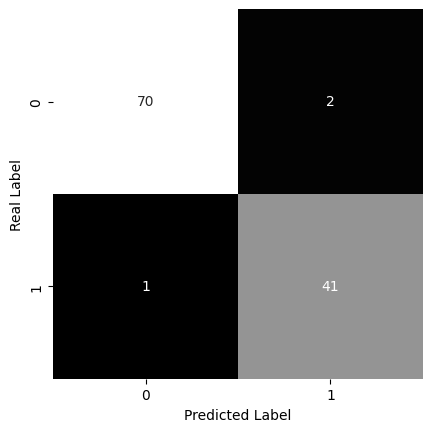

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(model.predict(x_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')

<Axes: >

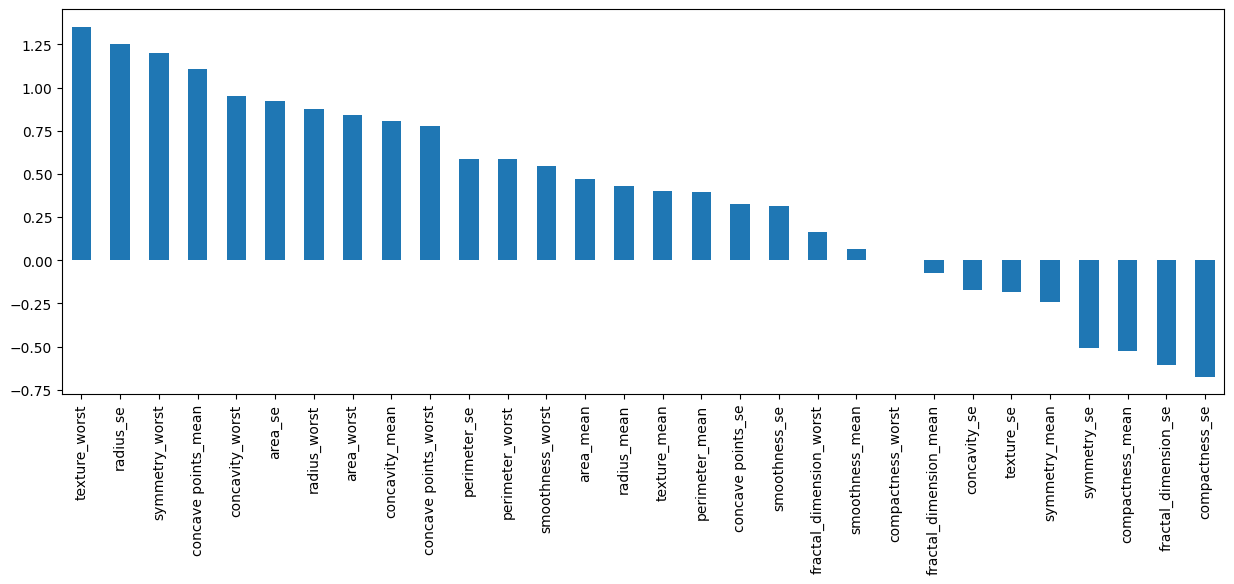

In [42]:
weights = pd.Series(model.coef_[0], index=x_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

In [43]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(x_train, y_train)
lasso.score(x_test,y_test)

0.9649122807017544

Text(0.5, 23.52222222222222, 'Predicted Label')

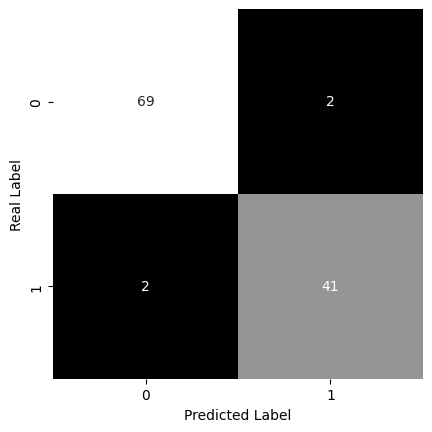

In [44]:

cm=confusion_matrix(lasso.predict(x_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')

<Axes: >

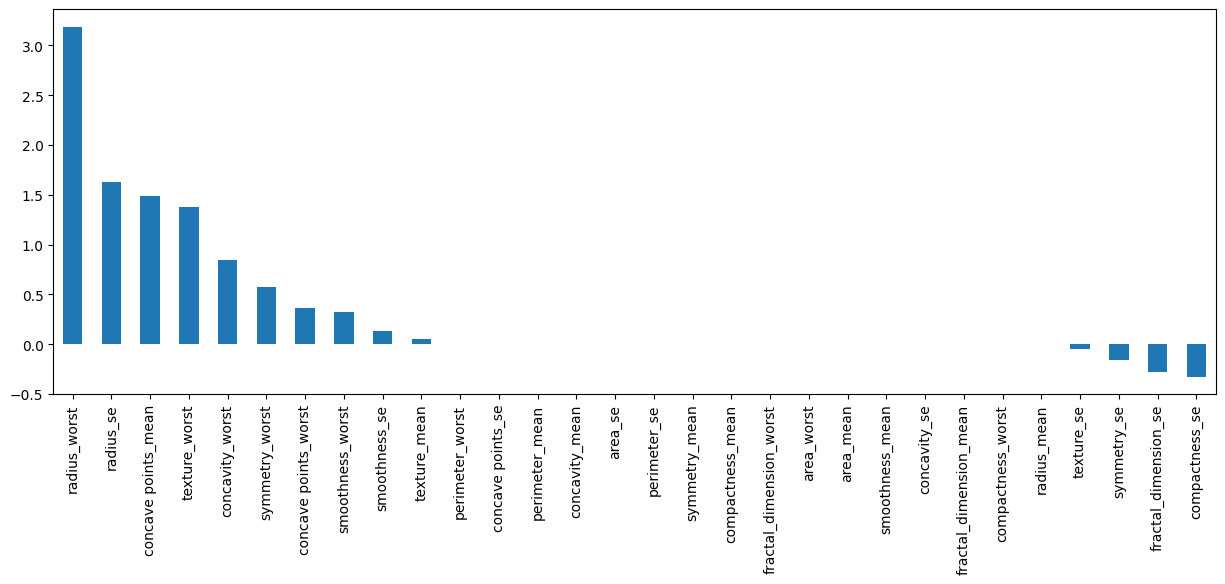

In [45]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

In [46]:
weights[weights==0]

perimeter_worst            0.0
concave points_se          0.0
perimeter_mean             0.0
concavity_mean             0.0
area_se                    0.0
perimeter_se               0.0
symmetry_mean              0.0
compactness_mean           0.0
fractal_dimension_worst    0.0
area_worst                 0.0
area_mean                  0.0
smoothness_mean            0.0
concavity_se               0.0
fractal_dimension_mean     0.0
compactness_worst          0.0
radius_mean                0.0
dtype: float64